In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
print(x_train.shape,len(y_train))
print(x_test.shape,len(y_test))

(60000, 28, 28) 60000
(10000, 28, 28) 10000


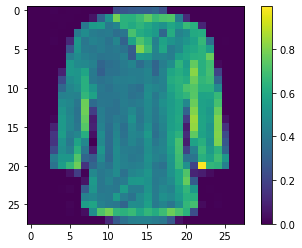

In [46]:
plt.figure()
plt.imshow(x_test[4])
plt.colorbar()
plt.grid(False)
plt.show()

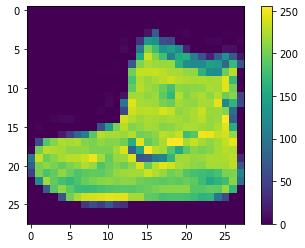

Epoch 1/50
1875/1875 [==============================] - 1s 646us/step - loss: 0.4978 - accuracy: 0.8255
Epoch 2/50
1875/1875 [==============================] - 1s 671us/step - loss: 0.3767 - accuracy: 0.8641
Epoch 3/50
1875/1875 [==============================] - 1s 692us/step - loss: 0.3385 - accuracy: 0.8752
Epoch 4/50
1875/1875 [==============================] - 1s 634us/step - loss: 0.3121 - accuracy: 0.8848
Epoch 5/50
1875/1875 [==============================] - 1s 664us/step - loss: 0.2950 - accuracy: 0.8912
Epoch 6/50
1875/1875 [==============================] - 1s 633us/step - loss: 0.2808 - accuracy: 0.8959
Epoch 7/50
1875/1875 [==============================] - 1s 624us/step - loss: 0.2677 - accuracy: 0.9016
Epoch 8/50
1875/1875 [==============================] - 1s 645us/step - loss: 0.2574 - accuracy: 0.9037
Epoch 9/50
1875/1875 [==============================] - 1s 621us/step - loss: 0.2482 - accuracy: 0.9066
Epoch 10/50
1875/1875 [==============================] - 1s 715u

In [15]:
# 查看数据集中的第2张图片
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)
plt.show()

# 预处理数据，将像素值除以255，使其缩放到0到1的范围
x_train = x_train / 255.0
x_test = x_test / 255.0

# 搭建网络结构
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax') 
])

 # 设置损失函数、优化器及训练指标
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 训练模型
model.fit(x_train,y_train,epochs=50)

# 模型评估
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print('/nTest accuracy:',test_acc)

# 选择测试集中的图像进行预测
predictions=model.predict(x_test)

# 查看第一个预测
print("预测结果：",np.argmax(predictions[2]))
# 将正确标签打印出来和预测结果对比
print("真实结果：",y_test[2])

In [10]:
model.save("./fashion.h5")

INFO:tensorflow:Assets written to: ./fashion.json\assets


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 保存模型架构
model_json = model.to_json()
with open('./modelcc.json', 'w') as file:
    file.write(model_json)
# 保存模型权重
model.save_weights("modelqz.h5")